# Deep Learning for Text Sequences

We will explore deep-learning models that can process text (understood as sequences of word or sequences of characters), timeseries, and sequence data in general. The two fundamental deep-learning algorithms for sequence processing are **recurrent neural networks** and **1D convnets**, the one-dimensional version of the 2D convnets.

Applications of these algorithms include the following:
 - Document classification and timeseries classification, such as identifying the topic of an article or the author of a book
 - Timeseries comparisons, such as estimating how closely related two documents or two stock tickers are
 - Sequence-to-sequence learning, such as decoding an English sentence into French
 - Sentiment analysis, such as classifying the sentiment of tweets or movie reviews as positive or negative
 - Timeseries forecasting, such as predicting the future weather at a certain location, given recent weather data
 
### Working with Text Data

Text is one of the most widespread forms of sequence data. It can be understood as either a sequence of characters or a sequence of words, but it’s most common to work at the level of words. The deep-learning sequence-processing models can use text to produce a basic form of natural-language understanding, sufficient for applications including document classification, sentiment analysis, author identification, and even question-answering (QA) (in a constrained context). 

None of the deeplearning models truly understand text in a human sense; rather, these models can map the statistical structure of written language, which is sufficient to solve many simple textual tasks. Deep learning for natural-language processing is pattern recognition applied to words, sentences, and paragraphs, in much the same way that computer vision is pattern recognition applied to pixels.

Like all other neural networks, deep-learning models don’t take as input raw text: they only work with numeric tensors. **Vectorizing** text is the process of transforming text into numeric tensors. This can be done in multiple ways:
 - Segment text into words, and transform each word into a vector.
 - Segment text into characters, and transform each character into a vector.
 - Extract n-grams of words or characters, and transform each n-gram into a vector. **N-grams** are overlapping groups of multiple consecutive words or characters.
 
Collectively, the different units into which we can break down text (words, characters, or n-grams) are called **tokens**, and breaking text into such tokens is called **tokenization**. All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens. These vectors, packed into sequence tensors, are fed into deep neural networks. There are multiple ways to associate a vector with a token. Two major ones: ***one-hot
encoding of tokens*** , and ***token embedding (typically used exclusively for words, and called
word embedding)***.

![capture](https://user-images.githubusercontent.com/13174586/50069599-cf1bdf80-01f0-11e9-9d69-a8065ea71006.JPG)


#### Understanding n-grams and bag-of-words
Word n-grams are groups of N (or fewer) consecutive words that we can extract from a sentence. The same concept may also be applied to characters instead of words. Here’s a simple example. Consider the sentence “The cat sat on the mat.” It may be
decomposed into the following set of 2-grams:

```{"The", "The cat", "cat", "cat sat", "sat",```

```"sat on", "on", "on the", "the", "the mat", "mat"}```

It may also be decomposed into the following set of 3-grams:

```{"The", "The cat", "cat", "cat sat", "The cat sat",```

```"sat", "sat on", "on", "cat sat on", "on the", "the",```

```"sat on the", "the mat", "mat", "on the mat"}```

Such a set is called a ***bag-of-2-grams*** or ***bag-of-3-grams***, respectively. The term bag here refers to the fact that you’re dealing with a set of tokens rather than a list or sequence: the tokens have no specific order. This family of tokenization methods is called bag-of-words.

Because bag-of-words isn’t an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in shallow language-processing models rather than in deep-learning models. Extracting n-grams is a form of feature engineering, and deep learning does away with this kind of rigid, brittle approach, replacing it with hierarchical feature learning. One-dimensional convnets and recurrent neural networks,are capable of learning representations for groups of words and characters without being explicitly told about the existence of such groups, by looking at continuous word or character sequences. 

### One-hot Encoding of Words and Characters
One-hot encoding is the most common, most basic way to turn a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index ***i*** into a binary vector of size ***N (the size of the
vocabulary)***; the vector is all zeros except for the ***i*** th entry, which is ***1***.

Of course, one-hot encoding can be done at the character level, as well. To unambiguously drive home what one-hot encoding is and how to implement it, below are two toy examples: one for words, the other for characters

#### Word-level One-hot Encoding (Toy Example)

In [8]:
import numpy as np

samples=('The cat sat on the mat.', 'The dog ate my homework.') #Initial data: one entry per sample 
                                                                #(in this example, a sample is a sentence,
                                                                #but it could be an entire document)
        
token_index={} #Build an index of all token in the data
for sample in samples:
    for word in sample.split(): #Tokenizes the samples via the split method. In real life, we’d also 
                                #strip punctuation and special characters from the samples.
        if word not in token_index:
            token_index[word]= len(token_index)+1 #Assigns a unique index to each unique word. Note that we don’t
                                                  #attribute index 0 to anything.
max_length= 10 #Vectorizes the samples. We’ll only consider the first max_length words in each sample.

results= np.zeros(shape=(len(samples), #This is where we store the results
                 max_length,
                 max(token_index.values()) +1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index=token_index.get(word)
        print(index)
        results[i,j, index]= 1.
        print(results)

1
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
2
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 

#### Character-level One-hot Encoding (Toy Example)

In [9]:
import string

samples=('The cat sat on the mat.', 'The dog ate my homework.')

characters= string.printable #All printable ASCII characters

token_index= dict(zip(range(1, len(characters)+1), characters))

max_length=50
results= np.zeros((len(samples), max_length, max(token_index.keys())+1 ))
results.shape

for i, sample in enumerate(samples):
    print(i, sample)
    for j, character in enumerate(sample):
        index= token_index.get(character)
        print(index)
        results[i,j, index]= 1
        print(results)

0 The cat sat on the mat.
None
[[[1. 1. 1. ... 1. 1. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
None
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
None
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [

Keras has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data. You should use these utilities, because they take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in our dataset (a common restriction, to avoid dealing with very large input vector spaces).

#### Using Keras for Word-level One-hot Encoding

In [10]:
from keras.preprocessing.text import Tokenizer

samples=('The cat sat on the mat.', 'The dog ate my homework.')

tokenizer= Tokenizer(num_words=1000) #Creates a tokenizer, configured to only take 
                                    #into account the 1,000 most common words

tokenizer.fit_on_texts(samples)  #Builds the word index
print(tokenizer)

sequences= tokenizer.texts_to_sequences(samples) #Turns strings into lists of integer indices
print(sequences)

one_hot_results= tokenizer.texts_to_matrix(samples, mode='binary') #We could also directly get the one-hot binary 
                                                                    #representations. Vectorization modes other than 
                                                                    #one-hot encoding are supported by this tokenizer.
print(one_hot_results)

word_index= tokenizer.word_index #How we can recover the word index that was computed
print(word_index)

print("Found %s unique tokens"%len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Found 9 unique tokens


A variant of one-hot encoding is the so-called **one-hot hashing trick**, which we can use when the number of unique tokens in our vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, we can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (we can generate token vectors right away, before we’ve seen all of the available data). The one drawback of this approach is that it’s susceptible to **hash collisions**: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

#### Word-level One-hot Encoding With Hashing Trick (Toy Example)

In [14]:
samples=('The cat sat on the mat.', 'The dog ate my homework.')

dimensionality= 1000 #Stores the words as vectors of size 1,000. If you have close
                    #to 1,000 words (or more), you’ll see many hash collisions,
                    #which will decrease the accuracy of this encoding method
max_length=10

results= np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(sample):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index= abs(hash(word)%dimensionality) #Hashes the word into a random integer index between 0 and 1,000
        print(index)
        results[i,j, index]=1
        print(results)

378
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of **dense word vectors**, also called **word embeddings**. Whereas the vectors obtained through one-hot encoding are *binary, sparse (mostly made of zeros), and very high-dimensional* (same dimensionality as the number of words in the vocabulary), word embeddings are low dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors). Unlike the word vectors obtained via one-hot encoding, word
embeddings are learned from data. It’s common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. On the other hand, one-hot encoding words generally leads to vectors
that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in this case). So, word embeddings pack more information into far fewer dimensions.

![capture](https://user-images.githubusercontent.com/13174586/50081612-f2588600-0214-11e9-9d6f-ae5450f13b4d.JPG)

There are two ways to obtain word embeddings:
 - Learn word embeddings jointly with the main task we care about (such as document classification or sentiment prediction). In this setup, we start with random word vectors and then learn word vectors in the same way we learn the weights of a neural network.
 - Load into our model word embeddings that were precomputed using a different machine-learning task than the one we’re trying to solve. These are called **pretrained word embeddings**.
 
Let’s look at both.

#### LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
The simplest way to associate a dense vector with a word is to choose the vector at random. The problem with this approach is that the resulting embedding space has no structure: for instance, the words *accurate* and *exact* may end up with completely
different embeddings, even though they’re interchangeable in most sentences. It’s difficult for a deep neural network to make sense of such a noisy, unstructured embedding space.

To get a bit more abstract, the geometric relationships between word vectors should reflect the semantic relationships between these words. Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable
embedding space, we would expect synonyms to be embedded into similar word vectors; and in general, we would expect the geometric distance (such as L2 distance) between any two word vectors to relate to the semantic distance between the associated
words (words meaning different things are embedded at points far away from each other, whereas related words are closer). In addition to distance, we may want specific *directions* in the embedding space to be meaningful. To make this clearer, let’s
look at a concrete example.

Four words are embedded on a 2D plane: cat, dog, wolf, and tiger. With the vector representations we chose here, some semantic relationships between these words can be encoded as geometric transformations. For instance, the same vector allows us to go from cat to tiger and from dog to wolf : this vector could be interpreted as the “from pet to wild animal” vector. Similarly, another vector lets us go from dog to cat and from wolf to tiger, which could be interpreted as a “from canine to feline” vector.
![capture](https://user-images.githubusercontent.com/13174586/50082748-b83cb380-0217-11e9-82fe-2ca0f128e7e3.JPG)

In real-world word-embedding spaces, common examples of meaningful geometric transformations are “gender” vectors and “plural” vectors. For instance, by adding a “female” vector to the vector “king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.” Word-embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural-language-processing task? Possibly, but we have yet to compute anything of the sort. Also, there is no such a thing as *human language*—
there are many different languages, and they aren’t isomorphic, because a language is the reflection of a specific culture and a specific context. But more pragmatically, what makes a good word-embedding space depends heavily on our task: the perfect word-embedding space for an English-language movie-review sentiment analysis model may look different from the perfect embedding space for an English language legal-document-classification model, because the importance of certain semantic relationships varies from task to task.

It’s thus reasonable to **learn** a new embedding space with every new task. Fortunately, backpropagation makes this easy, and Keras makes it even easier. It’s about learning the weights of a layer: the ```Embedding``` layer.

### Instantiating an Embedding Layer

In [18]:
from keras.layers import Embedding

embedding= Embedding(1000, 64) #The Embedding layer takes at least two arguments: the number of possible tokens
                                #(here, 1,000: 1 + maximum word index) and the dimensionality of the embeddings (here, 64)

The ```Embedding``` layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. It’s effectively a dictionary lookup

<span style="color:purple">WORD INDEX -> EMBEDDING LAYER -> CORRESPONDING WORD VECTOR </span>

The ```Embedding``` layer takes as input a 2D tensor of integers, of shape ```(samples, sequence_length)```, where each entry is a sequence of integers. It can embed sequences of variable lengths: for instance, we could feed into the Embedding layer in
the previous example batches with shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15) (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (because we need to pack them into a single tensor),
so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating-point tensor of shape ```(samples, sequence_length, embedding_dimensionality)```. Such a 3D tensor can then be processed by an **RNN** layer or a **1D convolution** layer (both will be introduced in the following
sections).

When we instantiate an ```Embedding``` layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which we’re training our model.

Let’s apply this idea to the IMDB movie-review sentiment-prediction task that we’re already familiar with. First, we’ll quickly prepare the data. We’ll restrict the movie reviews to the top 10,000 most common words and cut off the reviews after only 20 words. The network will learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single Dense layer on top for classification.

### Load The IMDB Data for Use With an Embedding Layer

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features= 10000 #Number of words to consider as features
maxlen=20 #Cuts off the text after this number of words (among the max_features most common words)

(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words= max_features) #Loads data as list of integers

x_train= preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)    #Turns the lists of integers into a 2D  
x_test= preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)    #integer tensor of shape (samples, maxlen)

Using TensorFlow backend.


### Use an Embedding Layer and Classifier on The IMDB Data

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

model= Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) 

model.add(Flatten())#Flattens the 3D tensor of embeddings into a 2D tensor 
                    #of shape (samples, maxlen * 8)
model.add(Dense(1, activation='sigmoid'))

In [3]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [4]:
history= model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 390us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc

We get to a validation accuracy of ~76%, which is pretty good considering that we’re only looking at the first 20 words in every review. But note that merely flattening the embedded sequences and training a single ```Dense``` layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both “this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s
much better to add ```recurrent``` layers or ```1D convolutional``` layers on top of the embedded sequences to learn features that take into account each sequence as a whole.

#### USING PRETRAINED WORD EMBEDDINGS
Sometimes, we have so little training data available that we can’t use our data alone to learn an appropriate task-specific embedding of our vocabulary. What do we do then?

Instead of learning word embeddings jointly with the problem we want to solve, we can load embedding vectors from a precomputed embedding space that we know is highly structured and exhibits useful properties—that captures generic aspects of language structure. The rationale behind using pretrained word embeddings in natural-language processing is much the same as for using pretrained convnets in image classification: we don’t have enough data available to learn truly powerful features on your own, but we expect the features that we need to be fairly generic—that is, common visual features or semantic features. In this case, it makes sense to reuse features learned on a different problem.

Such word embeddings are generally computed using word-occurrence statistics (observations about what words co-occur in sentences or documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, lowdimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started to take off in research and industry applications after the release of one of the most famous and successful word-embedding schemes: the **Word2vec** algorithm (https://code.google.com/ archive/p/word2vec), developed by Tomas Mikolov at Google in 2013. Word2vec dimensions capture specific semantic properties, such as gender.

There are various precomputed databases of word embeddings that we can download and use in a Keras Embedding layer. Word2vec is one of them. Another popular one is called **Global Vectors for Word Representation** (GloVe, https://nlp.stanford
.edu/projects/glove), which was developed by Stanford researchers in 2014. This embedding technique is based on factorizing a matrix of word co-occurrence statistics. Its developers have made available precomputed embeddings for millions of
English tokens, obtained from Wikipedia data and Common Crawl data.

Let’s look at how we can get started using GloVe embeddings in a Keras model. The same method is valid for Word2vec embeddings or any other word-embedding database.

#### DOWNLOADING THE IMDB DATA AS RAW TEXT
First, head to http://mng.bz/0tIo and download the raw IMDB dataset. Uncompress it.

Now, let’s collect the individual training reviews into a list of strings, one string per review. We’ll also collect the review labels (positive/negative) into a labels list.

### Process The Labels of The Raw IMDB Data

In [5]:
import os

imdb_dir= 'IMDB_Data/aclImdb'
train_dir= os.path.join(imdb_dir, 'train')


labels=[]
texts=[]

for label_type in ['pos', 'neg']:
    dir_name= os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]=='.txt':
            f= open(os.path.join(dir_name,fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)

#### TOKENIZING THE DATA
Let’s vectorize the text and prepare a training and validation split. Because pretrained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we’ll add the following twist: restricting the training data to the first 200 samples. So we’ll learn to classify movie reviews after looking at just 200 examples.

### Tokenize The Text of The Raw IMDB Data

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=100 #Cuts off reviews after 100 words
training_samples=20000 #Trains on 200 samples
validation_samples=10000 #Validates on 10,000 samples
max_words=10000 #Considers only the top 10,000 words in the dataset

tokenizer= Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
print(tokenizer)
sequences= tokenizer.texts_to_sequences(texts)

In [35]:
word_index=tokenizer.word_index
print({key:value for key, value in list(word_index.items())[:10]})

print("Found %s unique tokens"%len(word_index))

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10}
Found 88582 unique tokens


In [36]:
data= pad_sequences(sequences, maxlen=maxlen)
data

array([[5924,  482,   69, ...,   12,    9,  215],
       [ 111,   10,  255, ...,    5,  335,  405],
       [   8, 7576,    1, ...,    6,  176,  396],
       ...,
       [   1, 2817,   30, ...,   17,   96,   75],
       [ 107,    9,   29, ...,  260, 1195,  794],
       [ 344,   39,  106, ...,   11,    6, 1350]])

In [37]:
labels= np.array(labels)
print("Shape of data densor", data.shape)
print("Shape of labels tensor", labels.shape)

Shape of data densor (25000, 100)
Shape of labels tensor (25000,)


In [38]:
indices= np.arange(data.shape[0]) #Splits the data into a training set and a validation set, but first shuffles the data,
                                  #because you’re starting with data in which samples are ordered (all negative first, then
                                  #all positive)
np.random.shuffle(indices)

data= data[indices]
data
labels= labels[indices]

In [39]:
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val= data[training_samples:training_samples+validation_samples]
y_val= labels[training_samples:validation_samples+training_samples]

#### DOWNLOADING THE GLOVE WORD EMBEDDINGS
Go to https://nlp.stanford.edu/projects/glove, and download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it.

#### PREPROCESSING THE EMBEDDINGS
Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings) to their vector representation (as number vectors).

### Parse The GloVe Word-embeddings File

In [40]:
glove_dir= 'GLOVE'
embeddings_index= {}
f= open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values=line.split()
    word=values[0]
    coefs= np.asarray(values[1:], dtype='float32')
    embeddings_index[word]=coefs
f.close()

print('Found %s word vectors in GLOVE.6B.100D'%len(embeddings_index))

Found 400000 word vectors in GLOVE.6B.100D


Next, we’ll build an embedding matrix that we can load into an ```Embedding``` layer. It must be a matrix of shape ```(max_words, embedding_dim)```, where each entry i contains the ```embedding_dim``` -dimensional vector for the word of index i in the reference word index (built during tokenization). Note that index 0 isn’t supposed to stand for any word or token—it’s a placeholder.

### Prepare The GloVe Word-embeddings Matrix

In [41]:
embedding_dim=100

embedding_matrix= np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i< max_words:
        embedding_vector= embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]= embedding_vector #Words not found in the embedding index will be all zeros.
            

### Model definition

In [59]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

model= Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### LOADING THE GLOVE EMBEDDINGS IN THE MODEL

The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Load the GloVe matrix we prepared into the Embedding layer, the first layer in the model.

### Load Pretrained Word Embeddings Into The Embedding Layer

In [60]:
model.layers[0].set_weights([embedding_matrix]) 
model.layers[0].trainable=False

Additionally, we’ll freeze the ```Embedding``` layer (set its trainable attribute to False), following the same rationale we’re already familiar with in the context of pretrained convnet features: when parts of a model are pretrained (like our Embedding layer) and parts are randomly initialized (like our classifier), the pretrained parts shouldn’t be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the already-learned features

### Model Training nad Evaluation

In [61]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['acc'])

history= model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pretrained_glove_model.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 106us/step - loss: 0.7086 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 2/30
20000/20000 [==============================] - 2s 93us/step - loss: 0.6945 - acc: 0.5057 - val_loss: 0.6930 - val_acc: 0.5052
Epoch 3/30
20000/20000 [==============================] - 2s 92us/step - loss: 0.6951 - acc: 0.5095 - val_loss: 0.6932 - val_acc: 0.5062
Epoch 4/30
20000/20000 [==============================] - 2s 105us/step - loss: 0.6938 - acc: 0.5227 - val_loss: 0.6945 - val_acc: 0.5100
Epoch 5/30
20000/20000 [==============================] - 2s 91us/step - loss: 0.6823 - acc: 0.5533 - val_loss: 0.7096 - val_acc: 0.5024
Epoch 6/30
20000/20000 [==============================] - 2s 91us/step - loss: 0.6502 - acc: 0.6159 - val_loss: 0.7283 - val_acc: 0.5002
Epoch 7/30
20000/20000 [==============================] - 2s 91us/step - loss: 0.6020 - acc: 0.6753 - val_loss: 0.8026 - val_ac

### Plot the Results

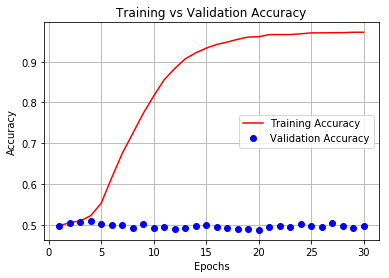

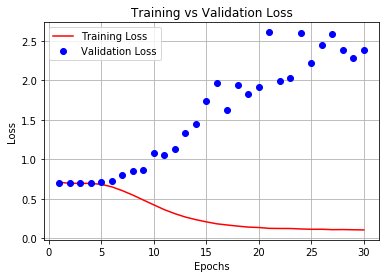

In [62]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, 'bo', color='blue', label='Validation Accuracy')
plt.grid()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, val_loss, 'bo', color='blue', label='Validation Loss')
plt.grid()
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of training samples. Validation accuracy has high variance for the same reason, but it seems to reach the high 50s.

Note that our mileage may vary: because wou have so few training samples, performance is heavily dependent on exactly which 200 samples you choose—and we’re choosing them at random. If this works poorly, will try choosing a different random set of 200 samples.

We can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, we’ll learn a task specific embedding of the input tokens, which is generally more powerful than pretrained word embeddings when lots of data is available. But in this case, we have only 200 training samples.

### Training The Same Model Without Pretrained Word Embeddings

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

model=Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history= model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 136us/step - loss: 0.6939 - acc: 0.5050 - val_loss: 0.6941 - val_acc: 0.5006
Epoch 2/30
20000/20000 [==============================] - 2s 118us/step - loss: 0.4667 - acc: 0.7875 - val_loss: 0.9066 - val_acc: 0.5080
Epoch 3/30
20000/20000 [==============================] - 2s 118us/step - loss: 0.0808 - acc: 0.9763 - val_loss: 1.5239 - val_acc: 0.5172
Epoch 4/30
20000/20000 [==============================] - 2s 118us/step - loss: 0.0159 - acc: 0.9978 - val_loss: 1.9964 - val_acc: 0.5122
Epoch 5/30
20000/20000 [==============================] - 2s 118us/step - loss: 0.0088 - acc: 0.9982 - val_loss: 2.2511 - val_acc: 0.5074
Epoch 6/30
20000/20000 [==============================] - 2s 118us/step - loss: 0.0055 - acc: 0.9986 - val_loss: 2.9330 - val_acc: 0.5074
Epoch 7/30
20000/20000 [==============================] - 2s 119us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 3.2700 - v

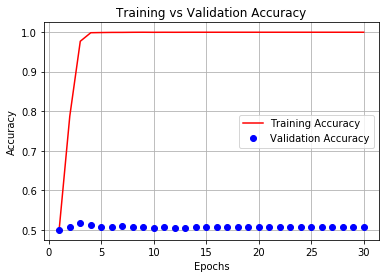

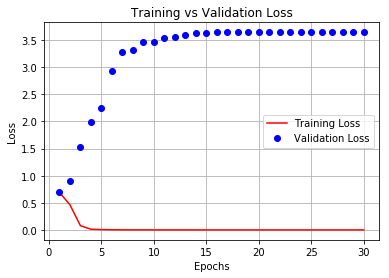

In [51]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, 'bo', color='blue', label='Validation Accuracy')
plt.grid()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, val_loss, 'bo', color='blue', label='Validation Loss')
plt.grid()
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings outperform jointly learned embeddings. If we increase the number of training samples, this will quickly stop being the case.

Finally, let’s evaluate the model on the test data. First, we need to tokenize the test data.

### Tokenize The Data of The Test Set

In [57]:
test_dir= os.path.join(imdb_dir,'test')
labels=[]
texts=[]
for label_type in ['pos', 'neg']:
    dir_name= os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:]=='.txt':
            f= open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences= tokenizer.texts_to_sequences(text)
x_test= pad_sequences(sequences, maxlen)
y_test= np.array(labels)

### Evaluate The Model on The Test Set

In [63]:
model.load_weights('pretrained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 37us/step


[2.3902314934539794, 0.49404]

We get an appalling test accuracy of 49%. Working with just a handful of training samples is difficult!